In [1]:
from glob import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tifffile
import skimage
import os
import pandas as pd
import scipy
import json

c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [7]:
np.percentile(distance, 99)

6.374596859267912

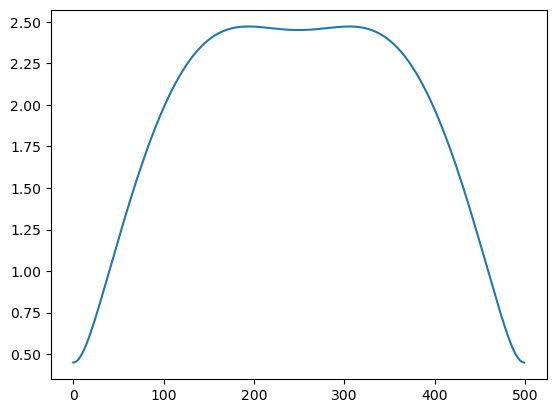

In [93]:
mins = []
for i in range(len(y_data)):
    distance = np.sqrt((y_data[i]-y_outer)**2 + (x_data[i]-x_outer)**2)
    plt.plot(distance)
    idx = np.argmin(  distance)
    mins.append(idx)
    break

mins = np.array(mins)

In [21]:
out_process.release()

NameError: name 'out_process' is not defined

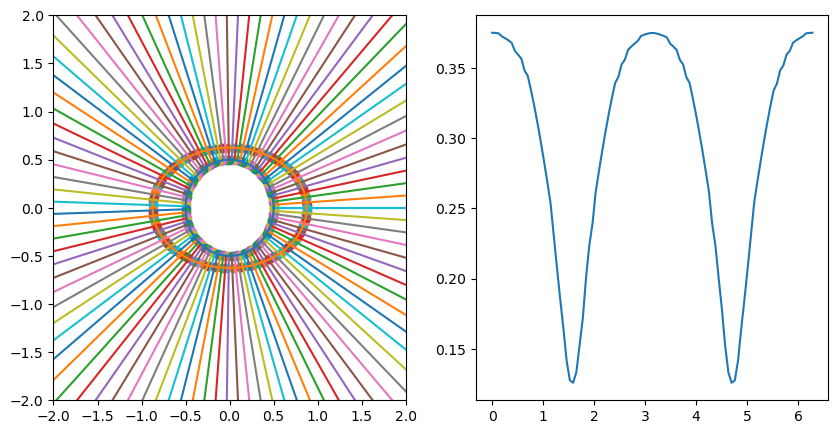

In [3]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))

deg = np.linspace(0, 2*np.pi, 100)
deg_2 = np.linspace(0, 2*np.pi, 500)
A_inner = 0.5

y_inner = A_inner*np.sin(deg)
x_inner = A_inner*np.cos(deg)

y_outer = 1.25*A_inner*np.sin(deg_2)
x_outer = 1.75*A_inner*np.cos(deg_2)

k_inner = y_inner/x_inner
distances = []
i = 0
for i in range(len(deg)):

    if (1/2*np.pi > deg[i]) | (3/2*np.pi < deg[i]):
        x_data = np.linspace(x_inner[i], np.max(x_inner)+5, len(y_inner))
        y_data = k_inner[i]*x_data
    else:
        x_data = np.linspace(x_inner[i], np.min(x_inner)-5, len(y_inner))
        y_data = k_inner[i]*x_data

    mins = []
    for k in range(len(y_data)):
        distance = np.sqrt((y_data[k]-y_outer)**2 + (x_data[k]-x_outer)**2)
        idx = np.argmin(  distance)
        mins.append(idx)

    mins = int(np.median(np.array(mins)))
    ax[0].scatter(x_inner[i], y_inner[i])
    ax[0].plot(x_data, y_data)
    ax[0].scatter(x_outer[mins], y_outer[mins])
    distances.append(np.sqrt((x_outer[mins] - x_inner[i] )**2 + (y_outer[mins] - y_inner[i])**2))


distances = np.array(distances)

ax[0].plot(x_inner, y_inner)
ax[0].plot(x_outer, y_outer)

ax[0].set_xlim((-2,2))
ax[0].set_ylim((-2,2))

ax[1].plot(deg, distances)






In [9]:

from skimage.morphology import erosion, dilation, opening, closing, white_tophat  # noqa
from skimage.morphology import disk, square  # noqa

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 
import glob
import tqdm

from nd2reader import ND2Reader
import h5py
import pickle
import json

import datetime

import warnings
warnings.filterwarnings('ignore')

import ffmpeg

from skimage.filters import rank, threshold_otsu, threshold_local#
from skimage import morphology

import scipy 
import skimage

import pandas as pd
import seaborn as sns
import csv

import six
import struct

#Choose path

root_path = "E:/instru_projects/TimeLapses/u-wells/IPN"
#root_path = "D:/"

results = os.path.join(root_path, "results")
os.makedirs(results, exist_ok=True)
video_path = glob.glob(os.path.join(root_path, "*_spheroidCulturemCherry.nd2"))[1] #240519_timelapses_IPN3mM_3lines_48h



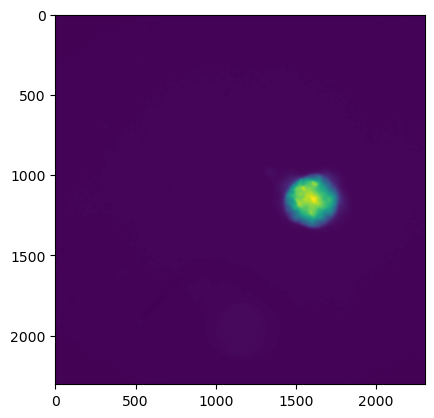

In [21]:
plt.imshow(img_bf)

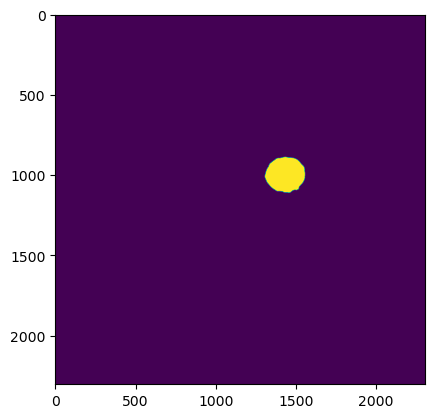

In [105]:

#out_name = "./test.mp4"
#out_process = cv2.VideoWriter(out_name, cv2.VideoWriter_fourcc(*"mp4v"), 5, (2304,2304))

with ND2Reader(video_path) as images:

    #for k in range(0,48):
    #for j in range(metas["n_frames"]):
    #for z in range(metas["n_levels"]):

    img_bf = images.get_frame_2D(c=0, t=0, z=19, x=0, y=0, v=0)
    #img_bf = (img_bf/(2**16)*2**8).astype("uint8")

    img_bf = scipy.ndimage.gaussian_filter(img_bf, (3,3))
    #th = skimage.filters.threshold_yen(img_bf)
    th = yen_filter_16(img_bf)
    binary = img_bf > th
    #tuned_fl = closing(tuned_fl,disk(5))
    #frame = img_bf.copy() #(img_bf/(2**16)*2**8).astype("uint8")
    #img_bf = images.get_frame_2D(c=1, t=k, z=19, x=0, y=0, v=4)


    #tuned_fl = scipy.ndimage.gaussian_filter(img_fl, (5,5))
    #th = np.percentile(tuned_fl.flatten(), 97.5)
    #frame[frame<th] = 0
    #frame[frame>=th] = 1

    #frame = scipy.ndimage.median_filter(tuned_fl, size = 5).astype("uint8")
    #img_bf = (img_bf/(2**16)*2**8).astype("uint8")
    #tuned_fl = skimage.exposure.equalize_adapthist(tuned_fl, clip_limit=0.075)
    #tuned_fl = closing(tuned_fl, disk(5)).astype("uint8")
    #tuned_fl = skimage.morphology.area_closing(tuned_fl, area_threshold= 1000)
    #img_bf = (img_bf/(2**16)*2**8).astype("uint8")
    #frame = np.stack((frame, frame, frame), axis = -1)
    #contours, hierarchy = cv2.findContours(image=tuned_fl, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE) 
    #cv2.drawContours(tuned_fl, contours, -1, (255, 0, 0), 3)
    #out_vis = cv2.addWeighted(img_bf,1.0,np.stack((frame,frame,frame), axis = -1)*255,0.25,5)
    #out_process.write(out_vis)
    plt.imshow(binary)

#out_process.release()



In [96]:
def yen_filter_16(image):

    max_val = 2**16
    counts, bin_centers =skimage.exposure.histogram(image.reshape(-1), max_val, source_range='image', normalize=False)

    # On blank images (e.g. filled with 0) with int dtype, `histogram()`
    # returns ``bin_centers`` containing only one value. Speed up with it.
    if bin_centers.size == 1:
        return bin_centers[0]

    # Calculate probability mass function
    pmf = counts.astype('float32', copy=False) / counts.sum()
    P1 = np.cumsum(pmf)  # Cumulative normalized histogram
    P1_sq = np.cumsum(pmf**2)
    # Get cumsum calculated from end of squared array:
    P2_sq = np.cumsum(pmf[::-1] ** 2)[::-1]
    # P2_sq indexes is shifted +1. I assume, with P1[:-1] it's help avoid
    # '-inf' in crit. ImageJ Yen implementation replaces those values by zero.
    crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
    return bin_centers[crit.argmax()]

In [28]:
th

36029

In [3]:
root2 = glob("C:/Users/lehtona6/Experiments/230710_/results/kuvasarja_2/Pos0/*.tif")

In [4]:
root2[0]

'E:/Time_lapses/230531/kuvasarja_8/Pos0\\metadata.txt'

In [5]:
# Opening JSON file
f = open(root2[0])
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [6]:
x = 1; y = 2
z =3

stacker = np.stack[[x,y,z])
stacker = np.stack([stacker, np.stack([x,y,z])], axis = 0)
np.concatenate(stacker, axis = 0)

array([1, 2, 3, 1, 2, 3])

In [7]:
data["FrameKey-0-0-0"]

{'HamamatsuHam_DCAM-TRIGGER SOURCE': 'INTERNAL',
 'HamamatsuHam_DCAM-INTERNAL LINE SPEED': '1.3353',
 'Core-Focus': 'Focus',
 'Channel': 'Refl-Dic',
 'Core-Initialize': '1',
 'HamamatsuHam_DCAM-OUTPUT TRIGGER SOURCE[1]': 'READOUT END',
 'Focus-Load Position': '0',
 'FrameIndex': 0,
 'HamamatsuHam_DCAM-PixelType': '16bit',
 'HamamatsuHam_DCAM-CONVERSION FACTOR COEFF': '0.2100',
 'HamamatsuHam_DCAM-OUTPUT TRIGGER KIND[1]': 'LOW',
 'HamamatsuHam_DCAM-OUTPUT TRIGGER POLARITY[1]': 'NEGATIVE',
 'ROI': '0-0-2304-2304',
 'Focus-Position': '434.4750',
 'Camera': '',
 'HamamatsuHam_DCAM-OUTPUT TRIGGER SOURCE[2]': 'READOUT END',
 'HamamatsuHam_DCAM-TRIGGER ACTIVE': 'EDGE',
 'ZeissSidePortTurret-Description': 'Zeiss SidePort Turret adapter',
 'Core-ImageProcessor': '',
 'ZeissObjectives-Label': 'x20',
 'HamamatsuHam_DCAM-ReadoutTime': '0.0316',
 'HamamatsuHam_DCAM-INTERNAL LINE SPEED UNITS': 'METERS PER SECOND',
 'SlicePosition': -70,
 'HamamatsuHam_DCAM-Module Version': '19.12.642.5902',
 'Hamama

In [230]:
data["Summary"]

{'Slices': 15,
 'InitialPositionList': None,
 'Interval_ms': 900000,
 'UUID': 'cb99ae71-8ca7-44bd-b62c-3d2e6ce7b061',
 'UserName': 'JPokki',
 'Depth': 2,
 'PixelType': 'GRAY16',
 'Time': '2023-05-30 12:14:06 +0300',
 'Date': '2023-05-30',
 'z-step_um': 10,
 'MetadataVersion': 10,
 'PositionIndex': 0,
 'SlicesFirst': True,
 'ChContrastMin': [0, 0],
 'Width': 2304,
 'PixelAspect': 1,
 'MicroManagerVersion': '1.4.21',
 'ROI': [0, 0, 2304, 2304],
 'ChNames': ['Refl-Dic', 'TexasRed'],
 'IJType': 1,
 'GridRow': 0,
 'Comment': '',
 'Height': 2304,
 'GridColumn': 0,
 'Prefix': 'kuvasarja_8',
 'PixelSize_um': 0,
 'Frames': 80,
 'BitDepth': 16,
 'KeepShutterOpenChannels': False,
 'Source': 'Micro-Manager',
 'Channels': 2,
 'ComputerName': 'JPokki-PC',
 'CustomIntervals_ms': [],
 'KeepShutterOpenSlices': False,
 'ChColors': [-1, -1],
 'TimeFirst': False,
 'ChContrastMax': [65536, 65536],
 'Positions': 1,
 'Directory': 'C:\\Users\\JPokki\\Documents\\salatiedostot\\230522\\230529_trial2'}

In [3]:
root =  glob("C:/Users/lehtona6/Experiments/230710_/results/kuvasarja_2/Pos0/*.tif")


In [6]:
len(root)

1092

In [18]:
parts = os.path.split(root[0])[1].split("_")
# name, time, channel, running 
int(parts[3][:-4])

0

In [22]:
level = None
chan = "Refl-Dic"

for level in np.arange(8,12):
    fourcc = cv2.VideoWriter_fourcc('F','F','V','1')
    out = cv2.VideoWriter("video_{}_{}.avi".format(chan, level), cv2.VideoWriter_fourcc(*'MJPG'), 10, (2304,2304))

    for j in np.arange(len(root)): #len(root)
        parts = os.path.split(root[j])[1].split("_")
        time = parts[1]
        channel = parts[2]
        running = int(parts[3][:-4])

        if (running == level) & (chan == channel):
            frame = cv2.imread(root[j])#/256).astype('uint8')

            out.write(frame)

            # Displaying the image

            cv2.imshow("main", cv2.resize(frame,(512,512)))
            k = cv2.waitKey(1); 
            if k == 'q':
                cv2.destroyAllWindows()

    out.release()        
    cv2.destroyAllWindows()



In [13]:
print(root,"\n", results)

['C:/Users/lehtona6/Experiments/230713\\23071301010101_ctr\\track.json', 'C:/Users/lehtona6/Experiments/230713\\23071301010201_ctr\\track.json', 'C:/Users/lehtona6/Experiments/230713\\23071301010301_ctr\\track.json', 'C:/Users/lehtona6/Experiments/230713\\23071301010401_ctr\\track.json', 'C:/Users/lehtona6/Experiments/230713\\23071301010501_ctr\\track.json', 'C:/Users/lehtona6/Experiments/230713\\23071301010601_ctr\\track.json', 'C:/Users/lehtona6/Experiments/230713\\23071301010701_ctr\\track.json', 'C:/Users/lehtona6/Experiments/230713\\23071302020101_cell\\track.json', 'C:/Users/lehtona6/Experiments/230713\\23071302020201_cell\\track.json', 'C:/Users/lehtona6/Experiments/230713\\23071302020301_cell\\track.json', 'C:/Users/lehtona6/Experiments/230713\\23071302020401_cell\\track.json', 'C:/Users/lehtona6/Experiments/230713\\23071302020501_cell\\track.json', 'C:/Users/lehtona6/Experiments/230713\\23071302020601_cell\\track.json', 'C:/Users/lehtona6/Experiments/230713\\23071302020701_cel

In [44]:
root =  glob("C:/Users/lehtona6/Experiments/230710_/*MicTry/*track.json")
root =  glob("C:/Users/lehtona6/Experiments/230713/*_cell/*track.json")
root =  glob("C:/Users/lehtona6/Experiments/230710/*_cell/*track.json")

In [45]:
results = glob("C:/Users/lehtona6/Experiments/230710_/*MicTry/results_all.csv")
results = glob("C:/Users/lehtona6/Experiments/230713/*_cell/results_all.csv")
results = glob("C:/Users/lehtona6/Experiments/230710/*_cell/results_all.csv")

In [39]:
import matplotlib.colors as mpl_colors
colors = mpl_colors.CSS4_COLORS



In [46]:
def norm(data):
    return data
    #return (data-data.mean())/data.std()

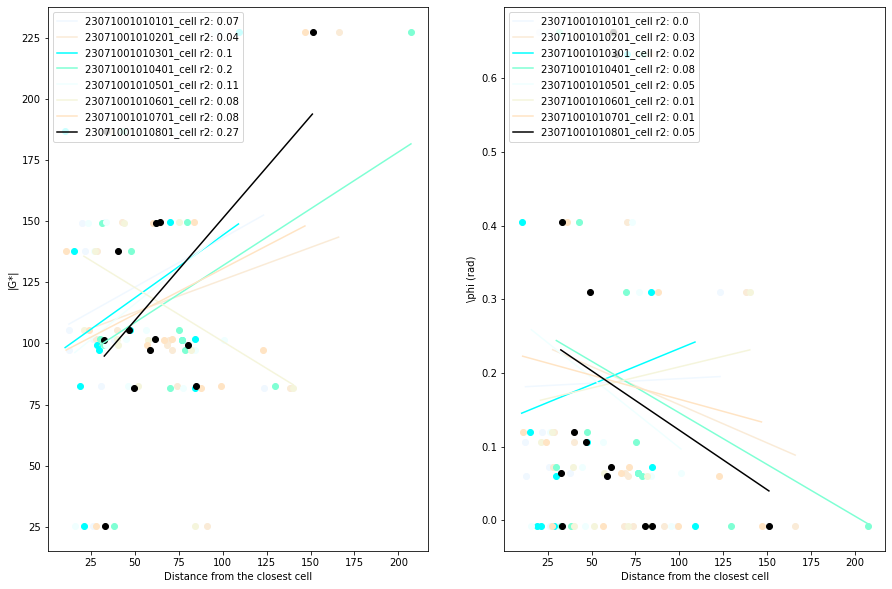

In [47]:
#colors = rand_colours = [random.choice(colour) for i in range(50)] #colors = ["blue","black","red","green"]
names = ["Meas 1.1", "Meas 1.2", "Meas 2.1", "Meas 2.2"]

fig, ax = plt.subplots(1,2,figsize=(15,10),facecolor='white')

for counter, radius_file in enumerate(root):
    #print(radius_file)
    name = radius_file.split("\\")[1]
    if os.path.exists(radius_file):
        with open(radius_file,'r') as f:
            data = json.load(f)

    cell_x = []
    cell_y = []

    big_x = []
    big_y = []

    GVal = []
    phiVal = []
    meas = []

    for count,k in enumerate(data.keys()):
        j = data[k]
        if j["label"] == 2:
            cell_x.append(j["x"][0]*0.27380952380952384)
            cell_y.append(j["y"][0]*0.27380952380952384)
        elif j["label"] == 1:
            big_x.append(j["x"][0]*0.27380952380952384)
            big_y.append(j["y"][0]*0.27380952380952384)

    df = pd.read_csv(results[0])
    df.drop(df[df['G_abs'] >= 350].index, inplace = True)
    
    mm = df.groupby(['track_id']).mean()
    mm = mm.reset_index()
    x = mm["x"]
    y = mm["y"]
    G_abs = norm(mm["G_abs"])
    phi = norm(mm["phi_(rad)"])

    cell_x = np.array(cell_x)
    cell_y = np.array(cell_y)

    big_x = np.array(big_x)
    big_y = np.array(big_y)  

    for i in range(len(x)):
        vec = np.sqrt((x[i]-cell_x)**2 + (y[i]-cell_y)**2)
        idx = np.argmin(vec)

        meas.append(vec[idx])
        GVal.append(G_abs[i])
        phiVal.append(phi[i])

    meas = np.array(meas)
    GVal = np.array(GVal)
    phiVal = np.array(phiVal)

    colorList = list(colors.keys())[counter]

    x_pred = np.arange(meas.min(),meas.max(), 0.1)
    a, b, r_value, p_value, std_err = scipy.stats.linregress(meas, GVal)
    ax[0].plot(x_pred, a*x_pred+b, color = colors[colorList], label = "{} r2: {}".format(name,round(r_value**2,2)))
    ax[0].scatter(meas, GVal, color = colors[colorList])

    x_pred = np.arange(meas.min(),meas.max(), 0.1)
    a, b, r_value, p_value, std_err = scipy.stats.linregress(meas, phiVal)
    ax[1].plot(x_pred, a*x_pred+b, color = colors[colorList], label = "{} r2: {}".format(name,round(r_value**2,2)))
    ax[1].scatter(meas, phiVal, color = colors[colorList])

ax[0].set_xlabel("Distance from the closest cell")
ax[0].set_ylabel("|G*|")
ax[0].legend(loc = "upper left")

ax[1].set_xlabel("Distance from the closest cell")
ax[1].set_ylabel(r'\phi (rad)')
ax[1].legend(loc = "upper left")

plt.show()


In [53]:
numpys = glob("C:/Users/lehtona6/Experiments/230710_/results/*.npy")
angles = np.load(numpys[0])
mag = np.load(numpys[1])

In [9]:
colors[0]

(114, 229, 239)

In [15]:
num = 8
#fourcc = cv2.VideoWriter_fourcc('F','F','V','1')
#out = cv2.VideoWriter('test_1.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10, (2304,2304))

for j in np.arange(0,len(root)): #int(len(root)/15)): #len(root)
    
    frame = cv2.imread(root[int(j)])#/256).astype('uint8') j*15

    #out.write(frame)

    # Displaying the image
    cv2.imshow("main", cv2.resize(frame,(512,512)))
    k = cv2.waitKey(1); 
    if k == 'q':
        cv2.destroyAllWindows()
        
#out.release()        
cv2.destroyAllWindows()



KeyboardInterrupt: 

In [16]:
cv2.destroyAllWindows()

In [17]:
import _pickle as cPickle
from UnetTracker import *

In [19]:
resultsFile = "E:/Time_lapses/230531/kuvasarja_8/Pos0/results/trackerOutput.pickle"

with open(resultsFile, "rb") as input_file:
    Data = cPickle.load(input_file)


ModuleNotFoundError: No module named 'tools.MTT'

In [2]:
img = cv2.imread("E:/Time_lapses/230612/kuvasarja_2/Pos0//img_000000000_TexasRed_009.tif")

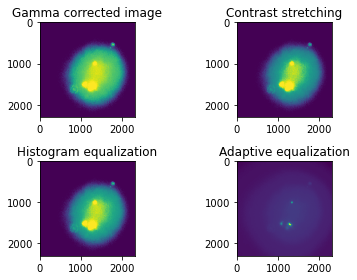

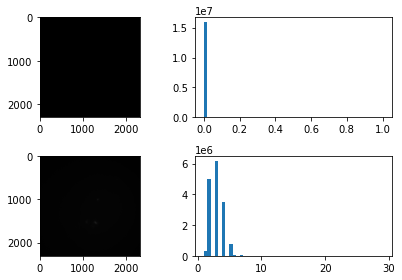

In [16]:
# Contrast stretching
p2, p98 = np.percentile(img, (50, 99))

imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_rescale = skimage.exposure.rescale_intensity(imgGray, in_range=(p2, p98))

# Equalization
img_eq = skimage.exposure.equalize_hist(imgGray)
logarithmic_corrected = skimage.exposure.adjust_log(img_rescale, 0.1)

# Adaptive Equalization
img_adapteq = skimage.exposure.equalize_adapthist(imgGray, clip_limit=0.005)
gamma_corrected = skimage.exposure.adjust_gamma(img_rescale, 0.5)



fig, ax = plt.subplots(2, 2)

ax[0,0].imshow(gamma_corrected)
ax[0,0].set_title('Gamma corrected image')

ax[0,1].imshow(img_rescale)
ax[0,1].set_title('Contrast stretching')

ax[1,0].imshow(logarithmic_corrected)
ax[1,0].set_title('Histogram equalization')

ax[1,1].imshow(img_adapteq)
ax[1,1].set_title('Adaptive equalization')


# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2)

imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_adapteq = skimage.exposure.equalize_adapthist(imgGray, clip_limit=0.005)
pImg = np.stack([img_adapteq,img_adapteq,img_adapteq], axis = -1).astype("uint8")
ax[0,0].imshow(pImg)
ax[0,1].hist(np.ndarray.flatten(pImg), bins = 50)
ax[1,0].imshow(img)
ax[1,1].hist(np.ndarray.flatten(img), bins = 50)

fig.tight_layout()
plt.show()

In [17]:
cv2.cvtColor(pImg, cv2.COLOR_BGR2GRAY)[...,np.newaxis]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [15]:
type(pImg.astype("uint8"))

numpy.ndarray

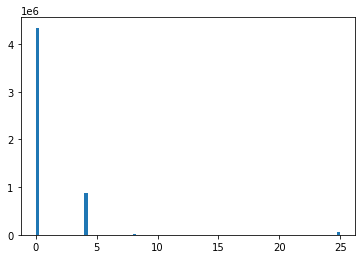

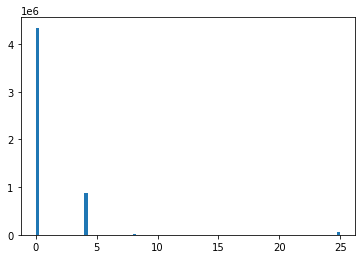

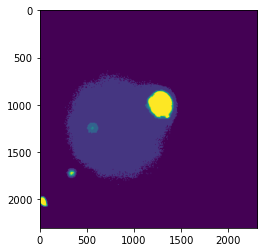

In [177]:
# Contrast stretching
p2, p98 = np.percentile(img, (50, 99))
img_rescale = skimage.exposure.rescale_intensity(imgGray, in_range=(p2, p98))
logarithmic_corrected = skimage.exposure.adjust_log(img_rescale, 0.1)

test = logarithmic_corrected.copy()
_ = plt.hist(np.matrix.flatten(test), bins = 100)
plt.show()

#test[test<5] = 0
_ = plt.hist(np.matrix.flatten(test), bins = 100)
plt.show()
plt.imshow(test)


In [204]:
def tuneContrast(frame):
    
    grayscale = skimage.color.rgb2gray(np.stack([frame,frame,frame], axis = -1))
    p2, p98 = np.percentile(grayscale, (50, 99))
    img_rescale = skimage.exposure.rescale_intensity(grayscale, in_range=(p2, p98))
    logarithmic_corrected = skimage.exposure.adjust_log(img_rescale, 0.1)
    return logarithmic_corrected

def kMeansFunc(frame):
    print(frame.shape)
    grayscale = skimage.color.rgb2gray(frame)
    image_gray= grayscale.reshape(grayscale.shape[0] * grayscale.shape[1], 1)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(image_gray)
    
    return kmeans, grayscale

def viz(kmeans, grayscale):
    
    fig, ax = plt.subplots(1, 3)

    clustered = kmeans.cluster_centers_[kmeans.labels_]
    labels = kmeans.labels_
    
    for n in range(3):
        image_cluster = []
        for i in range(len(labels)):
            if(labels[i]) == n:
                image_cluster.append(float(clustered[i]))
            else:
                image_cluster.append(1)
        if(n==1):
            image_fix= np.array(image_cluster).reshape(grayscale.shape)
            
        reshape_clustered = np.array(image_cluster).reshape(grayscale.shape)
        ax[n].imshow(reshape_clustered, cmap=plt.get_cmap("gray"),vmin=0, vmax=1)

    # redraw the canvas
    fig.canvas.draw()

    # convert canvas to image
    img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,
            sep='')
    plt.close()

    img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

    return img

    

In [205]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [207]:
path = "C:/Users/lehtona6/projects/work/instru_project-main/Videos/video_TexasRed_8.avi"

cap = cv2.VideoCapture(path)

save = True

if save:
    fourcc = cv2.VideoWriter_fourcc('F','F','V','1')
    out = cv2.VideoWriter('video_TexasRed_8_2.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10, (512,512)) #(2304,2304))

while (cap.isOpened()):
    
    ret, frame = cap.read()
    if ret == False:
        break
        
    img = frame.copy()
    
    imgTuned = tuneContrast(img)
    kmeans, gray = kMeansFunc(imgTuned)
    
    pltImg = viz(kmeans, gray) 

        
    # Displaying the image
    cv2.imshow("main", cv2.resize(pltImg,(512,512)))
    k = cv2.waitKey(1); 
    if k == 'q':
        cv2.destroyAllWindows()
        
        
    if save:
        out.write( cv2.resize(pltImg,(512,512)))
    
    print("round done")
        
cap.release()   
out.release() 
cv2.destroyAllWindows()


(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(2304, 2304, 3)
round done
(

In [193]:
cv2.destroyAllWindows()


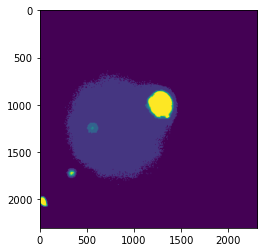

In [199]:
tes

In [175]:
p2, p98 = np.percentile(img, (50, 99))
img_rescale = skimage.exposure.rescale_intensity(imgGray, in_range=(p2, p98))
logarithmic_corrected = skimage.exposure.adjust_log(img_rescale, 0.1)

test = logarithmic_corrected.copy()

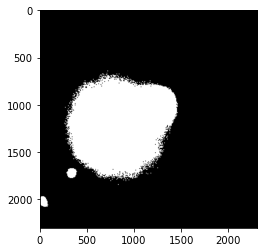

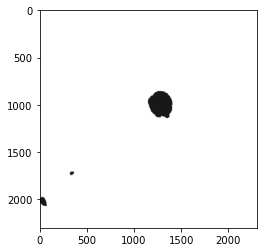

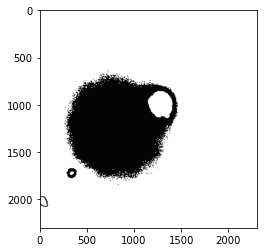

In [176]:
grayscale = skimage.color.rgb2gray(np.stack([test,test,test], axis = -1))
image_gray= grayscale.reshape(grayscale.shape[0] * grayscale.shape[1], 1)

kmeans = KMeans(n_clusters=3, random_state=0).fit(image_gray)

clustered = kmeans.cluster_centers_[kmeans.labels_]
labels = kmeans.labels_
for n in range(3):
    image_cluster = []
    for i in range(len(labels)):
        if(labels[i]) == n:
            image_cluster.append(float(clustered[i]))
        else:
            image_cluster.append(1)
    if(n==1):
        image_fix= np.array(image_cluster).reshape(grayscale.shape)
    reshape_clustered = np.array(image_cluster).reshape(grayscale.shape)
    plt.imshow(reshape_clustered, cmap=plt.get_cmap("gray"),vmin=0, vmax=1)
    plt.show()


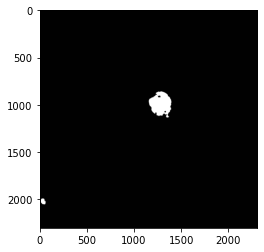

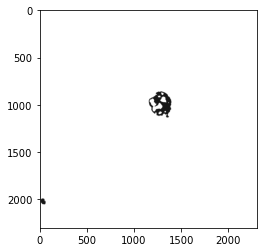

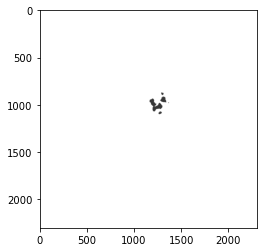

In [174]:
grayscale = skimage.color.rgb2gray(img)
image_gray= grayscale.reshape(grayscale.shape[0] * grayscale.shape[1], 1)

kmeans = KMeans(n_clusters=3, random_state=0).fit(image_gray)

clustered = kmeans.cluster_centers_[kmeans.labels_]
labels = kmeans.labels_
for n in range(3):
    image_cluster = []
    for i in range(len(labels)):
        if(labels[i]) == n:
            image_cluster.append(float(clustered[i]))
        else:
            image_cluster.append(1)
    if(n==1):
        image_fix= np.array(image_cluster).reshape(grayscale.shape)
    reshape_clustered = np.array(image_cluster).reshape(grayscale.shape)
    plt.imshow(reshape_clustered, cmap=plt.get_cmap("gray"),vmin=0, vmax=1)
    plt.show()


In [99]:
element = 32
ntiles_x = element 
ntiles_y = element
kernelsize = (np.round(imgGray.shape[0] / ntiles_y), 
            np.round(imgGray.shape[1] / ntiles_x)) 

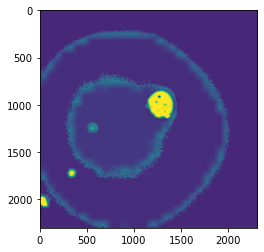

In [115]:
result =skimage.exposure.equalize_adapthist(imgGray, kernel_size = kernelsize, clip_limit=0.05)
result = skimage.exposure.adjust_sigmoid(result, cutoff = 0.1, gain = 20)
plt.imshow(result)

In [3]:
path = "C:/Users/lehtona6/projects/work/instru_project-main/Videos/video_TexasRed_8.avi"


In [116]:
cap = cv2.VideoCapture(path)

save = False

if save:
    fourcc = cv2.VideoWriter_fourcc('F','F','V','1')
    out = cv2.VideoWriter('video_TexasRed_8_2.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10, (2304,2304))

while (cap.isOpened()):
    
    ret, frame = cap.read()
    if ret == False:
        break
        
    img = frame.copy()
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret,th = cv2.threshold(imgGray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    if save:
        out.write(frame)

    # Displaying the image

    cv2.imshow("main", cv2.resize(th,(512,512)))
    k = cv2.waitKey(1); 
    if k == 'q':
        cv2.destroyAllWindows()
        
cap.release()        
cv2.destroyAllWindows()


In [26]:
cv2.destroyAllWindows

<function destroyAllWindows>

In [20]:

fourcc = cv2.VideoWriter_fourcc('F','F','V','1')
out = cv2.VideoWriter('test_1.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10, (2304,2304))


kernel = np.ones((10,10),np.uint8)
kernel_2 = np.ones((3,3),np.uint8)
kernel_3 = np.ones((5,5),np.uint8)

cap = cv2.VideoCapture(path)


history = 5  #I've also tried 2,5,20,200
varThreshold = 6
bShadowDetection = False

backSub = cv2.createBackgroundSubtractorKNN(history, varThreshold, bShadowDetection)


# Check if camera opened successfully
y_col = []
x_col = []
areas = []

threshold = 4000
threshold_2 = 50000

if (cap.isOpened()== False):
    print("Error opening video stream or file")
    exit(0)

counter = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
        
    img = frame.copy()
    
    
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fgMask = backSub.apply(imgGray)
    
    """
    opening = fgMask
    opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel_2)
    opening = cv2.dilate(opening,kernel,iterations = 1)
    opening = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_3)
    """

    opening = fgMask.astype("uint8")
    #opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel_2)
    
    #opening = skimage.morphology.closing(opening, skimage.morphology.disk(10))
    
    opening = scipy.ndimage.median_filter(opening, size=15)
    e = skimage.morphology.closing(opening, skimage.morphology.disk(10))
    
    #e2 = skimage.morphology.white_tophat(opening,skimage.morphology.disk(5))
    #e2 = skimage.morphology.dilation(e2,skimage.morphology.disk(5))
    
    tmp = e.astype("int")#-e2.astype("int")
    tmp[tmp<0] = 0
    tmp = tmp.astype("uint8")
    
    contours, hierarchy = cv2.findContours(image=tmp, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    #x,y,img = find_coordinates(contours, img)
    
    for i in np.arange(len(contours)):
        if (cv2.contourArea(contours[i])>threshold): #& #(cv2.contourArea(contours[i])<threshold_2):
            cv2.drawContours(image=img, contours=contours, contourIdx=i, color=(0, 255, 0), thickness=3)
     #       areas.append(cv2.contourArea(contours[i]))
    #        y_col.append(y[i])
    #        x_col.append(x[i])
    #        cv2.circle(img, (x_col[-1], y_col[-1]), 10, (255, 255, 255), -1)
            #string = "track", i
            #cv2.putText(img, string, (x_col[-1] - 20, y_col[-1] - 20),
            #           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 25), 2)
    counter += 1
    print(counter)
    if counter > history:
        out.write(img)
        #cv2.imshow('Frame',cv2.resize(img,(520,520)))
        #if cv2.waitKey(1) & 0xFF == ord('q'):
        #    break
        #else:
        #    continue

cap.release()
out.release()
#cv2.destroyAllWindows()

#y_col = np.array(y_col)
#x_col = np.array(x_col)
#areas = np.array(areas)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148


In [18]:
cv2.destroyAllWindows()


In [3]:
path = "C:/Users/lehtona6/projects/work/instru_project-main/test_1.avi"

In [ ]:

    self.kernel = np.ones((10,10),np.uint8)
    self.kernel_2 = np.ones((3,3),np.uint8)
    self.kernel_3 = np.ones((5,5),np.uint8)
    
    self.history = 5
    self.varThreshold = 6
    
    self.x_col = np.array([])
    self.y_col = np.array([])
    areas = np.array([])

def contour(self, frame):
    
    imgGray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    fgMask = skimage.filters.gaussian(imgGray,5)
    fgMask = skimage.filters.farid(fgMask)
    fgMask = 1-fgMask<99.925e-2
    fgMask = fgMask.astype("uint8")
    
    opening = cv2.morphologyEx(fgMask, cv2.MORPH_OPEN, kernel_2)
    opening = skimage.morphology.closing(opening, skimage.morphology.disk(10))
    
    tmp = opening.astype("int")#-e2.astype("int")
    tmp[tmp<0] = 0
    tmp = tmp.astype("uint8")
    
    contours, hierarchy = cv2.findContours(image=tmp, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    
    if len(contours) > 0:
        maxCnt = sorted(contours, key=cv2.contourArea, reverse= True)
        maxBoy = maxCnt[0]
        cnt = maxBoy
        M = cv2.moments(maxBoy)
        self.x_col.append(int(M['m10']/M['m00']))
        self.y_col.append(int(M['m01']/M['m00']))
        self.areas.append(cv2.contourArea(maxCnt[0]))
    
    cv2.drawContours(image=img, contours=maxCnt, contourIdx=0, color=(0, 255, 0), thickness=3)
    
    return img

In [4]:
# 
kernel = np.ones((10,10),np.uint8)
kernel_2 = np.ones((3,3),np.uint8)
kernel_3 = np.ones((5,5),np.uint8)

fourcc = cv2.VideoWriter_fourcc('F','F','V','1')
out = cv2.VideoWriter('testCnt_3.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10, (2304,2304))


cap = cv2.VideoCapture(path)


history = 5  #I've also tried 2,5,20,200
varThreshold = 6
bShadowDetection = False

backSub = cv2.createBackgroundSubtractorKNN(history, varThreshold, bShadowDetection)


# Check if camera opened successfully
y_col = []
x_col = []
areas = []

threshold = 4000
threshold_2 = 50000

if (cap.isOpened()== False):
    print("Error opening video stream or file")
    exit(0)

counter = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
        
    img = frame.copy()
    
    
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fgMask = skimage.filters.gaussian(imgGray,5)
    fgMask = skimage.filters.farid(fgMask)
    
    fgMask = 1-fgMask<99.925e-2
    opening = fgMask.astype("uint8")
    opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel_2)
    
    opening = skimage.morphology.closing(opening, skimage.morphology.disk(10))
    
    tmp = opening.astype("int")#-e2.astype("int")
    tmp[tmp<0] = 0
    tmp = tmp.astype("uint8")
    
    contours, hierarchy = cv2.findContours(image=tmp, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    #x,y,img = find_coordinates(contours, img)
    if len(contours) >0:
        maxCnt = sorted(contours, key=cv2.contourArea, reverse= True)
        maxBoy = maxCnt[0]
        cnt = maxBoy
        M = cv2.moments(maxBoy)
        x_col.append(int(M['m10']/M['m00']))
        y_col.append(int(M['m01']/M['m00']))
        areas.append(cv2.contourArea(maxCnt[0]))
    
    #for i in np.arange(len(contours)):
    #    if (cv2.contourArea(contours[i])>threshold): #& #(cv2.contourArea(contours[i])<threshold_2):
    cv2.drawContours(image=img, contours=maxCnt, contourIdx=0, color=(0, 255, 0), thickness=3)
     #       areas.append(cv2.contourArea(contours[i]))
    #        y_col.append(y[i])
    #        x_col.append(x[i])
    #        cv2.circle(img, (x_col[-1], y_col[-1]), 10, (255, 255, 255), -1)
            #string = "track", i
            #cv2.putText(img, string, (x_col[-1] - 20, y_col[-1] - 20),
            #           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 25), 2)
    counter += 1
    out.write(img)
    cv2.imshow('Frame',cv2.resize(img,(520,520)))
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
    else:
        continue

cap.release()
out.release()
cv2.destroyAllWindows()

y_col = np.array(y_col)
x_col = np.array(x_col)
areas = np.array(areas)

In [22]:
import scipy
import os
import skimage

Text(0, 0.5, 'area (um^2)')

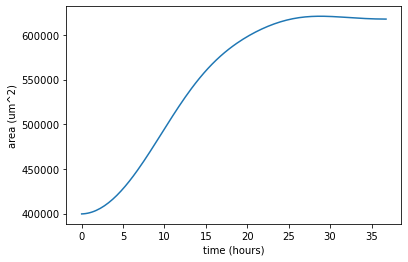

In [6]:
px = (6.5/(20*0.63))**2
plt.plot(np.arange(0,len(areas))*0.25,scipy.ndimage.gaussian_filter1d(areas,20)/(px))
plt.xlabel("time (hours)")
plt.ylabel("area (um^2)")


In [24]:
analyzer = timeLapseAnalyzer(root)
analyzer.startVideo()

AttributeError: 'NoneType' object has no attribute 'copy'

In [26]:
root

['C:/Users/lehtona6/Experiments/230710_/results/kuvasarja_2/Pos0\\img_000000000_Refl-Dic_000.tif',
 'C:/Users/lehtona6/Experiments/230710_/results/kuvasarja_2/Pos0\\img_000000000_Refl-Dic_001.tif',
 'C:/Users/lehtona6/Experiments/230710_/results/kuvasarja_2/Pos0\\img_000000000_Refl-Dic_002.tif',
 'C:/Users/lehtona6/Experiments/230710_/results/kuvasarja_2/Pos0\\img_000000000_Refl-Dic_003.tif',
 'C:/Users/lehtona6/Experiments/230710_/results/kuvasarja_2/Pos0\\img_000000000_Refl-Dic_004.tif',
 'C:/Users/lehtona6/Experiments/230710_/results/kuvasarja_2/Pos0\\img_000000000_Refl-Dic_005.tif',
 'C:/Users/lehtona6/Experiments/230710_/results/kuvasarja_2/Pos0\\img_000000000_Refl-Dic_006.tif',
 'C:/Users/lehtona6/Experiments/230710_/results/kuvasarja_2/Pos0\\img_000000000_Refl-Dic_007.tif',
 'C:/Users/lehtona6/Experiments/230710_/results/kuvasarja_2/Pos0\\img_000000000_Refl-Dic_008.tif',
 'C:/Users/lehtona6/Experiments/230710_/results/kuvasarja_2/Pos0\\img_000000000_Refl-Dic_009.tif',
 'C:/Users

In [23]:
class timeLapseAnalyzer():
    
    def __init__(self, root):
        
        self.viz = True
    
        self.out = None
        
        self.root = "C:/Users/lehtona6/Experiments/230710_/results"
        self.name = "video_Refl-Dic_9.avi"
        self.loadPath = os.path.join(self.root, self.name)
        
        self.flowFlag = True
        self.volumeFlag = False
        self.saveFlag = False
        
        self.prvs = None
        
        self.kernel = np.ones((10,10),np.uint8)
        self.kernel_2 = np.ones((3,3),np.uint8)
        self.kernel_3 = np.ones((5,5),np.uint8)

        self.history = 5
        self.varThreshold = 6

        self.x_col = np.array([])
        self.y_col = np.array([])
        areas = np.array([])
        
    def changesaveFlag(self):
        if self.saveFlag:
            self.saveFlag = True
        else:
            self.saveFlag = False
        
    def changeFlowFlag(self):
        if self.flowFlag:
            self.flowFlag = True
        else:
            self.flowFlag = False
            
    def changeVolumeFlag(self):
        if self.volumeFlag:
            self.volumeFlag = True
        else:
            self.volumeFlag = False
        
        
    def startVideo(self):
        
        if self.flowFlag & self.saveFlag:
            self.createSaver("opticalFlow.mp4")
        elif self.volumeFlag & self.saveFlag:
            self.createSaver("volume.mp4")
            
        
        cap = cv2.VideoCapture(self.loadPath)
        
        if (cap.isOpened()== False):
            print("Error opening video stream or file")
            exit(0)     
            
        counterFrame = -1

        while(cap.isOpened()):
            
            ret, frame = cap.read()
            counterFrame += 1
            
            if self.flowFlag:
                disp = self.opticalFlow(frame, counterFrame)
            
            if self.volumeFlag:
                disp = self.contour(frame, counterFrame)
            
            if ret == False:
                break
                
            if self.viz:
                cv2.imshow('Frame',cv2.resize(disp,(520,520)))

                if cv2.waitKey(20) & 0xFF == ord('q'):
                    break
                else:
                    continue
        self.shutdown()
        
        
    def opticalFlow(self, frame, idx): 
        
        #print(frame, "\n", idx)
        
        img = frame.copy()
        imgGray = skimage.color.rgb2gray(img)
        
        if idx == 0:
            self.prvs = imgGray
            return np.zeros_like(self.prvs)
            
        
        flow = cv2.calcOpticalFlowFarneback(self.prvs,imgGray, None, 0.5, 10, 5, 3, 5, 1.5, 0)
        mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
        self.prvs = imgGray
        
        hsv = np.zeros_like(np.stack([imgGray,imgGray,imgGray], axis=-1).astype("uint8"))
        
        hsv[...,1] = 255
        hsv[...,0] = ang*180/np.pi/2
        hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
        #print(hsv.shape, hsv.dtype)
        
        rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
        
        if self.saveFlag:
            self.writeFrame(rgb)
        
        return rgb
    
    def contour(self, frame, idx):
        
        img = frame.copy()

        imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        fgMask = skimage.filters.gaussian(imgGray,5)
        fgMask = skimage.filters.farid(fgMask)
        fgMask = 1-fgMask<99.925e-2
        fgMask = fgMask.astype("uint8")

        opening = cv2.morphologyEx(fgMask, cv2.MORPH_OPEN, kernel_2)
        opening = skimage.morphology.closing(opening, skimage.morphology.disk(10))

        tmp = opening.astype("int")#-e2.astype("int")
        tmp[tmp<0] = 0
        tmp = tmp.astype("uint8")

        contours, hierarchy = cv2.findContours(image=tmp, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

        if len(contours) > 0:
            maxCnt = sorted(contours, key=cv2.contourArea, reverse= True)
            maxBoy = maxCnt[0]
            cnt = maxBoy
            M = cv2.moments(maxBoy)
            self.x_col.append(int(M['m10']/M['m00']))
            self.y_col.append(int(M['m01']/M['m00']))
            self.areas.append(cv2.contourArea(maxCnt[0]))

        cv2.drawContours(image=img, contours=maxCnt, contourIdx=0, color=(0, 255, 0), thickness=3)

        return img
        
        
    def createSaver(self,name):
        fourcc = cv2.VideoWriter_fourcc('F','F','V','1')
        self.out = cv2.VideoWriter(os.path.join(root,'video_1.avi'), cv2.VideoWriter_fourcc(*'MJPG'), 10, (2304,2304))
        

    def writeFrame(frame):
        self.out.write(frame)
        
        
    def shutDown(self):
        cap.release()
        if self.saveFlag:
            out.release()
        if self.viz:
            cv2.destroyAllWindows()

    
    

In [25]:
cv2.destroyAllWindows()